In [3]:
import pandas as pd

data = pd.read_csv('housing.csv')
data.head()

,Age,Area,Quality,Price
0,89,720,4,34900
1,51,1276,5,60000
2,44,864,5,62383
3,65,747,4,80000
4,39,630,4,86000


/var/folders/g9/s15kjggj0bb9t_61f58dny800000gn/T/ipykernel_31142/392774054.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


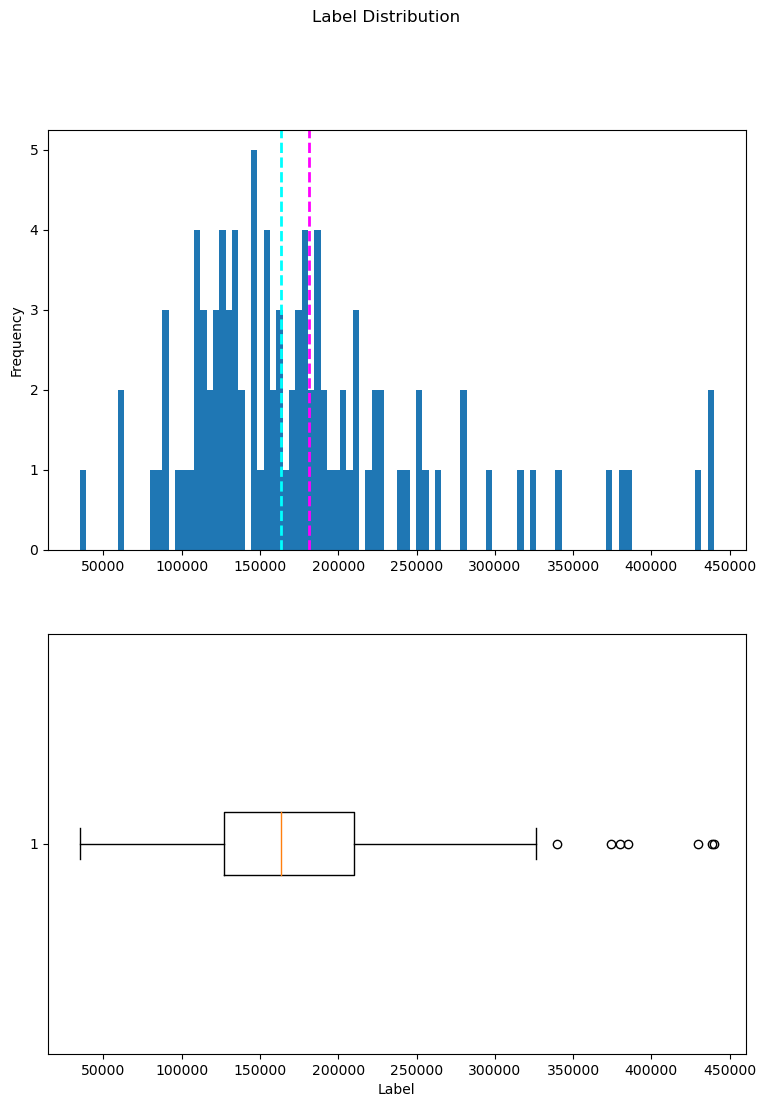

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

label = data[data.columns[-1]]

fig, ax = plt.subplots(2, 1, figsize = (9, 12))

ax[0].hist(label, bins = 100)
ax[0].set_ylabel('Frequency')

ax[0].axvline(label.mean(), color = 'magenta', linestyle = 'dashed', linewidth = 2)
ax[0].axvline(label.median(), color = 'cyan', linestyle = 'dashed', linewidth = 2)

ax[1].boxplot(label, vert = False)
ax[1].set_xlabel('Label')

fig.suptitle('Label Distribution')

fig.show()

/var/folders/g9/s15kjggj0bb9t_61f58dny800000gn/T/ipykernel_31142/1747114202.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


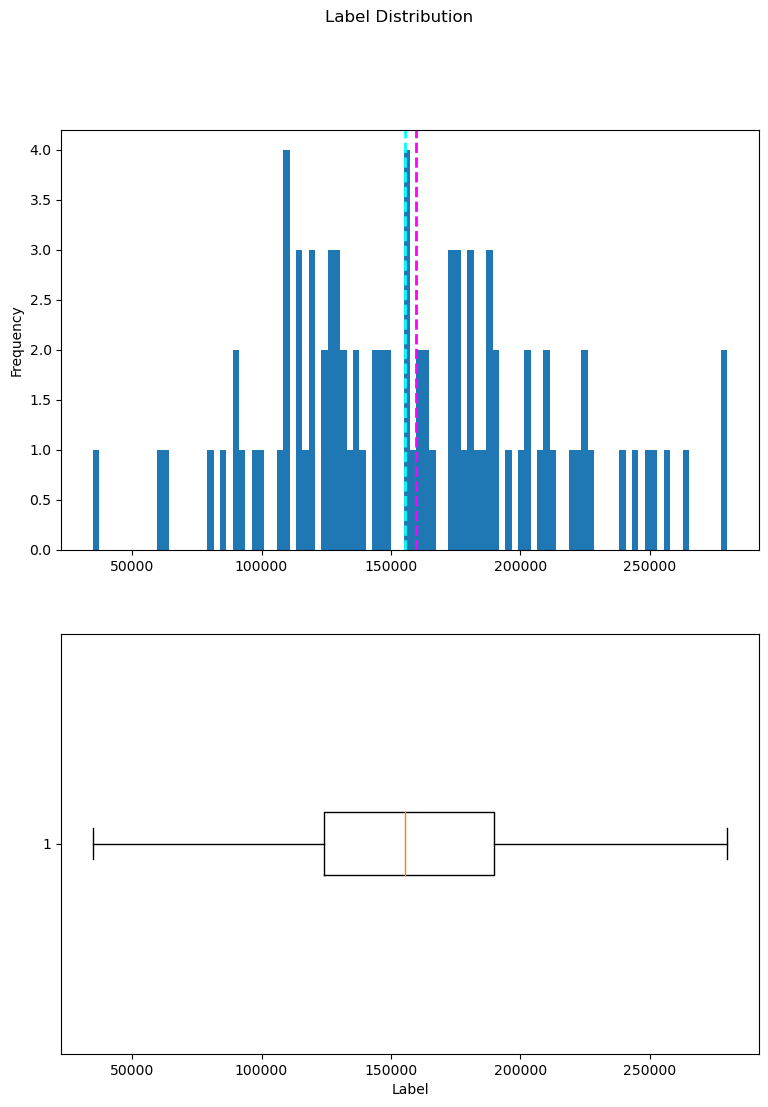

In [5]:
data.dropna()
data = data[data['Price'] < 290000]
label = data[data.columns[-1]]

fig, ax = plt.subplots(2, 1, figsize = (9, 12))

ax[0].hist(label, bins = 100)
ax[0].set_ylabel('Frequency')

ax[0].axvline(label.mean(), color = 'magenta', linestyle = 'dashed', linewidth = 2)
ax[0].axvline(label.median(), color = 'cyan', linestyle = 'dashed', linewidth = 2)

ax[1].boxplot(label, vert = False)
ax[1].set_xlabel('Label')

fig.suptitle('Label Distribution')

fig.show()

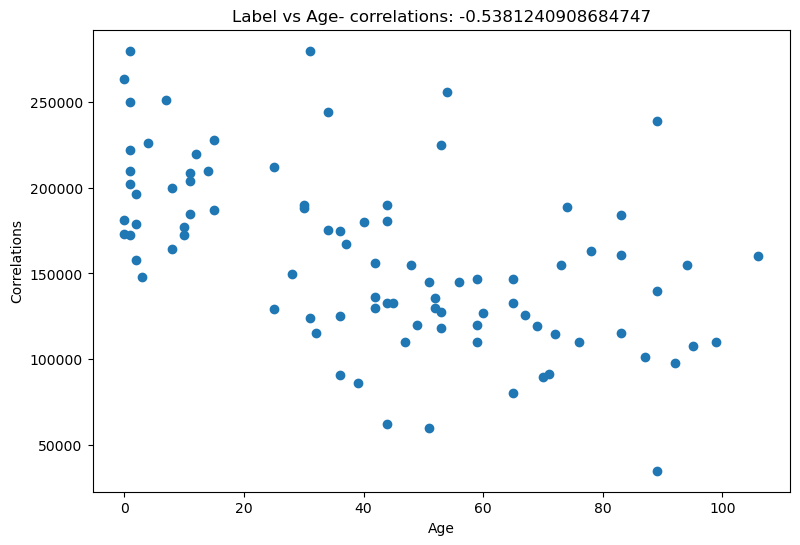

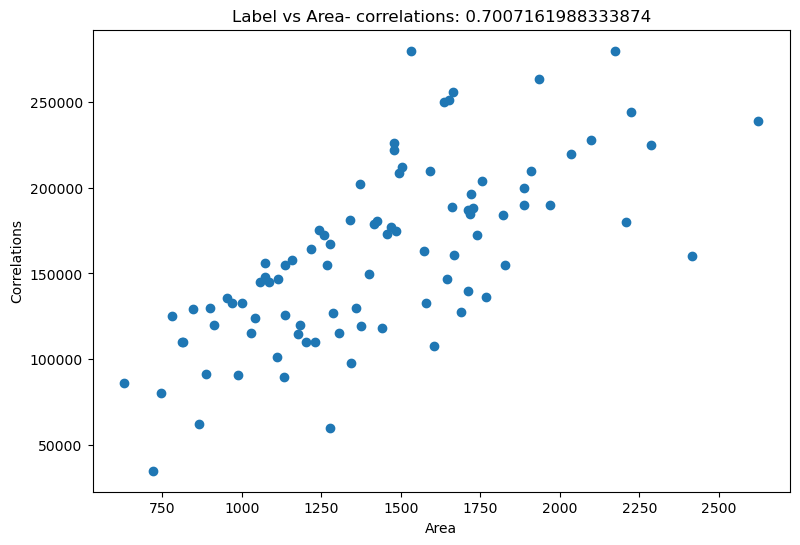

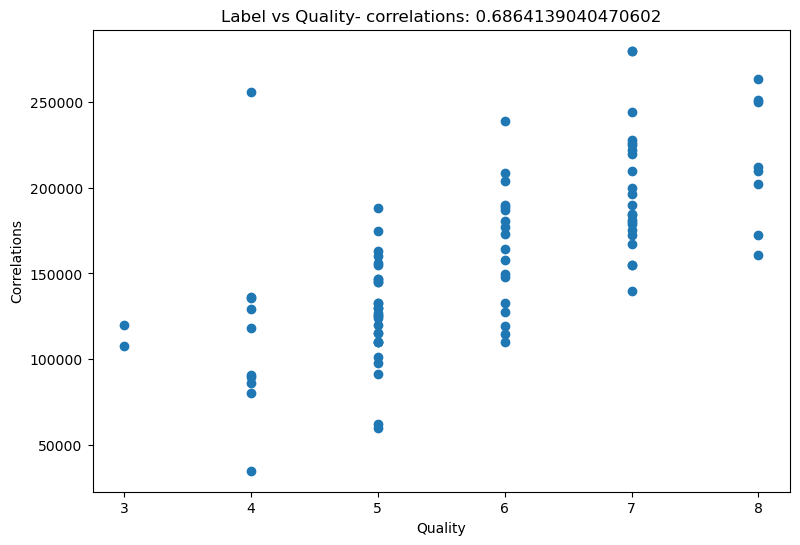

In [6]:
for col in data[data.columns[0:-1]]:
    fig = plt.figure(figsize = (9, 6))
    ax = fig.gca()
    feature = data[col]
    correlation = feature.corr(label)
    plt.scatter(x = feature, y = label)
    plt.xlabel(col)
    plt.ylabel('Correlations')
    ax.set_title('Label vs ' + col + '- correlations: ' + str(correlation))
plt.show()

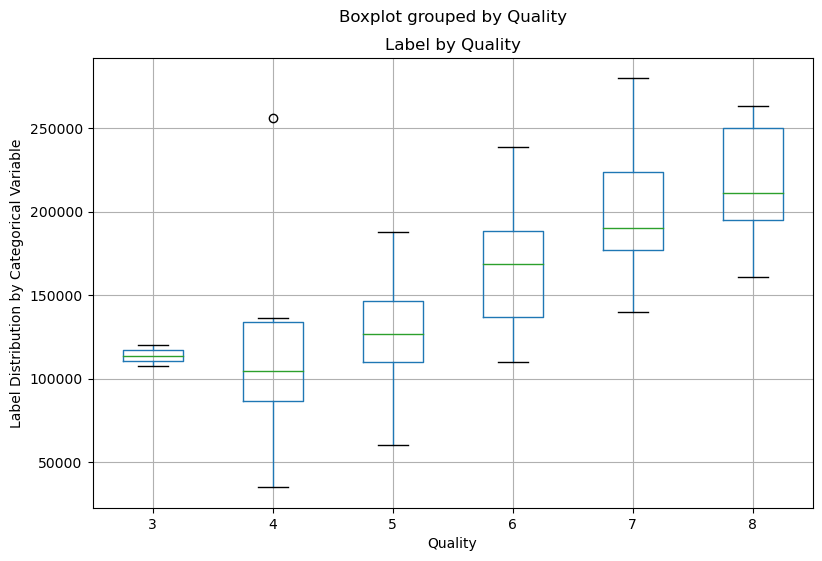

In [7]:
for col in data[['Quality']]:
    fig = plt.figure(figsize = (9, 6))
    ax = fig.gca()
    data.boxplot(column = 'Price', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Label Distribution by Categorical Variable")
plt.show()

In [38]:
from sklearn.model_selection import train_test_split

X, y = data[data.columns[0:-1]].values, data[data.columns[-1]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

print('Training Set: %d, rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 63, rows
Test Set: 27 rows


In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import numpy as np

numeric_features = [0, 1]
numeric_transformer = Pipeline(steps = [
    ('scaler', StandardScaler())])

categorical_features = [2]
categorical_transformer = Pipeline(steps = [
    ('ordinal', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                            ('regressor', RandomForestRegressor())])

model = pipeline.fit(X_train, y_train)
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1]),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  [2])])),
                ('regressor', RandomForestRegressor())])


MSE: 734160812.2918924
RMSE: 27095.402050751938
R2: 0.6855557110660315


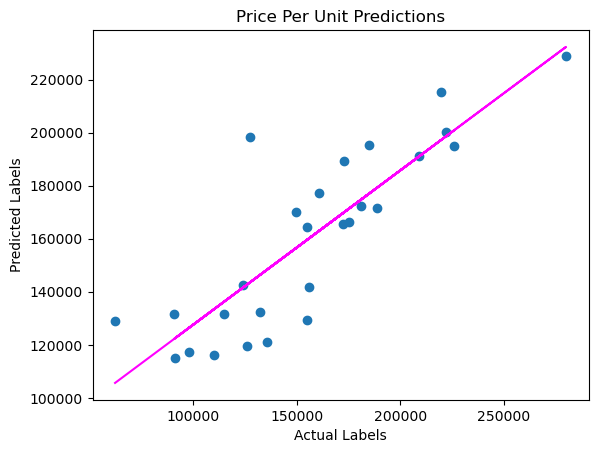

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price Per Unit Predictions')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = 'magenta')
plt.show()

GradientBoostingRegressor() 

MSE: 708713396.6148044
RMSE: 26621.6715593669
R2: 0.6964549505702611


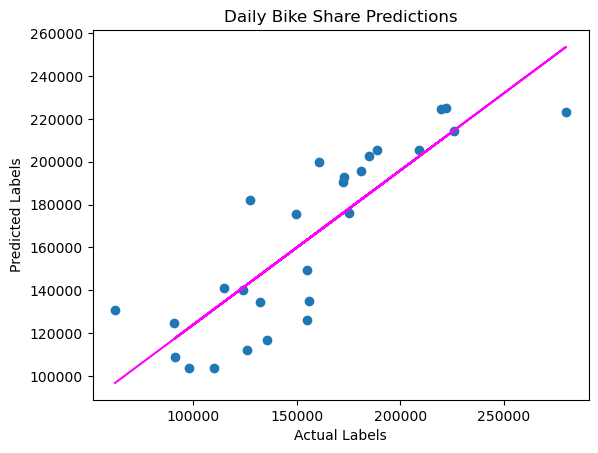

In [41]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 50} 

GradientBoostingRegressor(n_estimators=50) 

MSE: 641474906.8416231
RMSE: 25327.35491206342
R2: 0.7252534900070349


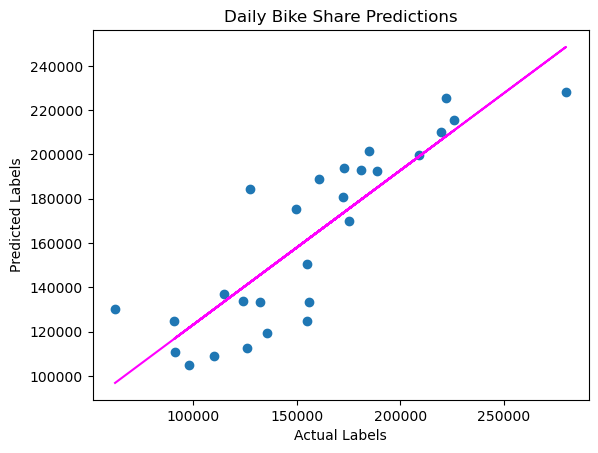

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model = gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [87]:
import pickle
model_filename = 'module2.pkl'
pickle.dump(model, open(model_filename, 'wb'))

model = pickle.load(open('module2.pkl', 'rb'))
print(model.predict([[65, 1578, 6]]))

[148047.55211636]
